In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D
import pandas as pd

In [59]:
# Load the training data from CSV file
train_data = pd.read_csv('../LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_data = pd.read_csv('../LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label']

# Load the testing data from CSV file
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

num_classes = 10

In [60]:
num_classes=10

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape((-1,28,28,1))   # -1,28*28
x_test=x_test.reshape((-1,28,28,1))   # -1,28*28

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [61]:
print("shape of training ",x_train.shape)
print("shape of testing ",x_test.shape)

shape of training  (60000, 28, 28, 1)
shape of testing  (10000, 28, 28, 1)


In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=2,batch_size=64 ,validation_data=(x_test, y_test))

Epoch 1/2
938/938 [==============================] - 34s 35ms/step - loss: 0.2348 - accuracy: 0.9300 - val_loss: 0.0870 - val_accuracy: 0.9738
Epoch 2/2
938/938 [==============================] - 33s 35ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 0.0603 - val_accuracy: 0.9798


In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

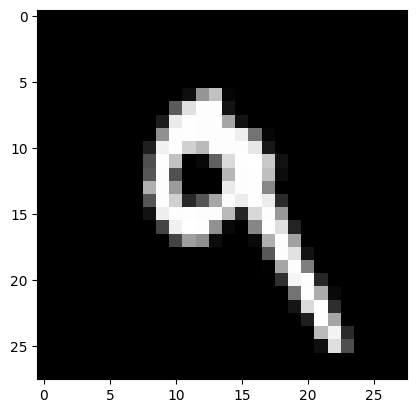

In [32]:
#showing image at position[] from dataset:
n=7
image = x_test[n]
plt.imshow(image.reshape(28, 28), cmap='gray')

In [51]:
predict_model = model.predict(x_test)
print("predicted class : ",np.argmax(predict_model[n]))

313/313 [==============================] - 2s 6ms/step
predicted class :  9


In [52]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

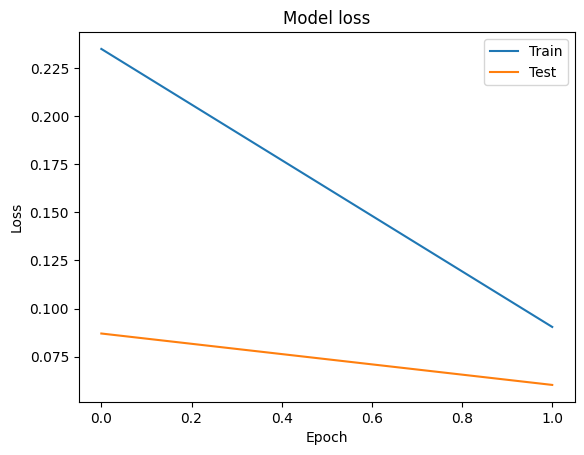

In [53]:
# Plot training & validation loss values
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

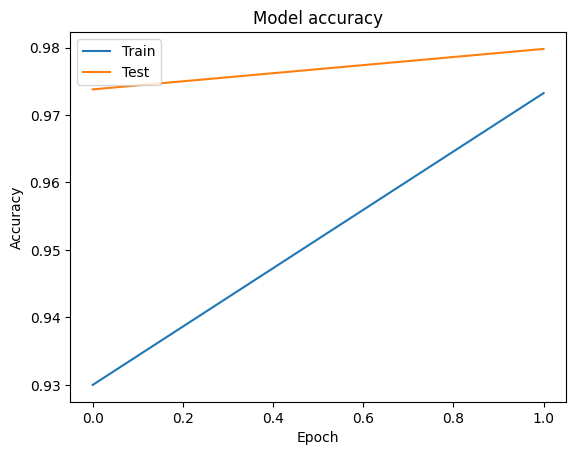

In [54]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()